In [183]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
#Importing the data from CSV
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

## Data Exploration to understand the data

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.shape

(23486, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Data Cleaning

In [9]:
# Create "Text" column by combining "Title" and "Review Text"
df["Text"] = df["Title"].fillna('') + " " + df["Review Text"]
# Remove leading and trailing spaces
df["Text"] = df["Text"].str.strip()
# remove unnecessary columns
df.drop(columns=['Unnamed: 0', 'Clothing ID', "Title", "Review Text","Positive Feedback Count"], axis=1, inplace=True)
df.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## Handling missing values and duplicates

In [11]:
#Sum of missing values
print(df.isnull().sum().sort_values(ascending=False))

#Printing missing values
print("===========Duplicates===========")
print(df.duplicated().sum())

#Removing duplicate values
df.drop_duplicates(inplace=True)

#Removing null values
df.dropna(inplace=True)


Text               845
Division Name       14
Department Name     14
Class Name          14
Age                  0
Rating               0
Recommended IND      0
dtype: int64
===========Duplicates===========
235


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22624 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              22624 non-null  int64 
 1   Rating           22624 non-null  int64 
 2   Recommended IND  22624 non-null  int64 
 3   Division Name    22624 non-null  object
 4   Department Name  22624 non-null  object
 5   Class Name       22624 non-null  object
 6   Text             22624 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [13]:
# Validating if null values and duplicates are removed
print(df.isnull().sum().sort_values(ascending=False))

print("===========Duplicates===========")
print(df.duplicated().sum())

Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
Text               0
dtype: int64
===========Duplicates===========
0


### Now this dataset contains 22,624 customer reviews, including age, rating, recommendation status, division, department, class name, and review text without any duplicates or missing values
    1. Numerical data - AGE, RATING AND RECOMMENDED ID
    2. CATEGORICAL data Division name, department name and class name
    3. TEXT COLUMN WITH REVIEWS
    

## Analysis of customer age

Minimum age:  18
Maximum age:  99
Average Age:  43.283946251768036


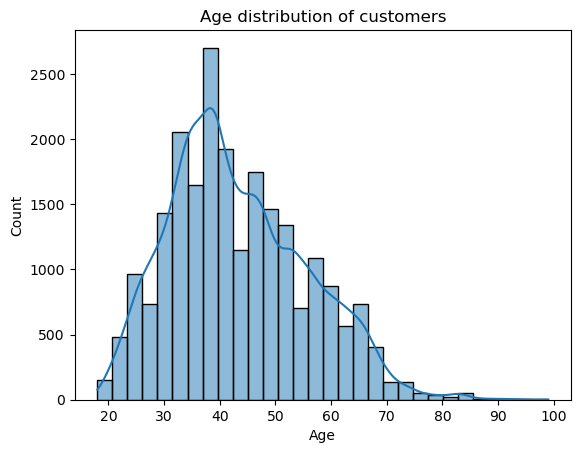

In [16]:
print('Minimum age: ', df['Age'].min())
print('Maximum age: ', df['Age'].max())
print('Average Age: ', df['Age'].mean())

# Histogram of age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age distribution of customers")
plt.show()

## Age distribution analysis
### The customers range from 18 years to 99 years with average age of 43 years.
Most of the reviews are posted by customers between **30-40** years of age. 
There is a declining trend in  the reviews from the customers ageging above 45 years.

**Key Insights:**¶
1. **Peak Engagement**: Most active reviewers are aged 30–45.
2. **Declining Trend**: Fewer reviews come from those 50+, with minimal from 80+.
3. **Marketing Opportunity**: Engaging younger and older shoppers could improve participation.


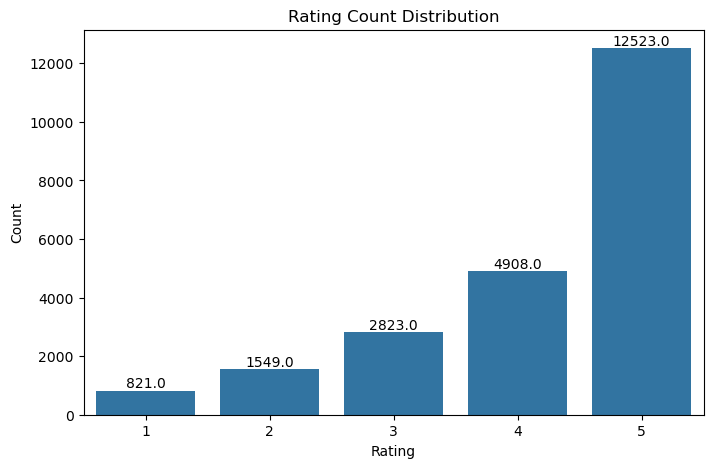

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Rating'])

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rating Count Distribution")

plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Maximum users have given ratings of either 4 star or 5 star

***Key insights***:
1. The maximum ratings are on higher side that is either 4 or 5 star out of total ratings.
2. The minimum rating 1 is very low in terms of numbers
3. The skewness towards the high ratings indicates that customers tends to review highly satisfying products and not reviewing the average or netural experience.
   

## Divison distribution

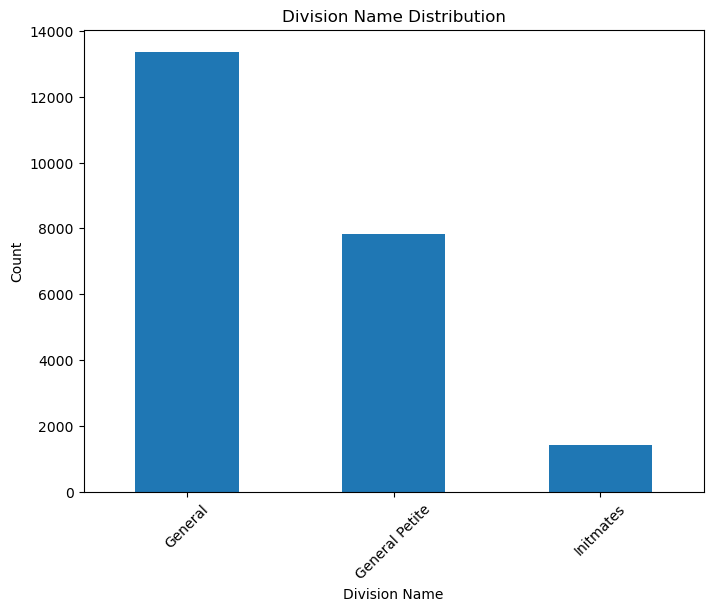

In [97]:
# Bar plot for projecting count vs Division name
plt.figure(figsize=(8,6))
df['Division Name'].value_counts().plot(kind='bar')
plt.title("Division Name Distribution")
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### Division Name Distribution Analysis¶

The General division has the highest number of reviews (13,364), followed by General Petite (7,837). The Intimates division has the least reviews (1,423), indicating lower engagement.

**Key Insights**:
1. **General Dominance**: Most reviews come from the General division, indicating a broader customer base.
2. **Petite Market Presence**: General Petite has significant engagement, showing demand for petite-sized clothing.
3. **Low Intimates Reviews**: The Intimates category has fewer reviews, suggesting either lower sales or customer hesitation in reviewing such items.

## Department Distribution

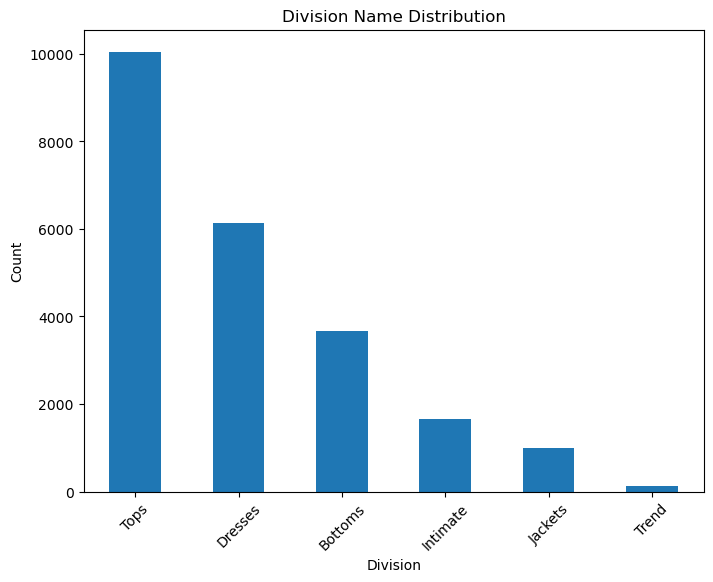

In [122]:
# Bar plot for projecting count vs Division name
plt.figure(figsize=(8,6))
df['Department Name'].value_counts().plot(kind='bar')
plt.title('Division Name Distribution')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Class Distribution

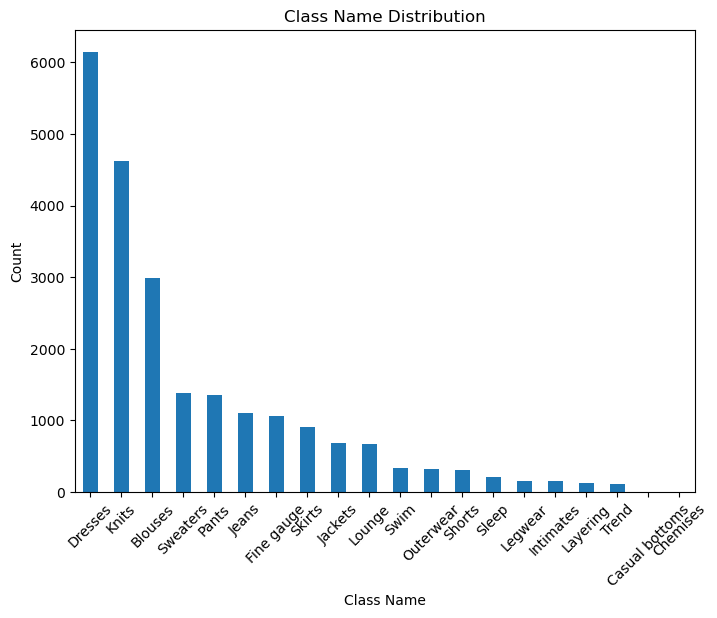

In [146]:
plt.figure(figsize=(8,6))
df['Class Name'].value_counts().plot(kind='bar')
plt.title('Class Name Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Class Distribution Analysis
The Dresses category has the highest number of reviews (6,145), followed by Knits (4,626) and Blouses (2,983). Other categories like Chemises (1) and Casual Bottoms (1) have extremely low engagement.

***Key Insights***:
1. **Top-Selling Items**: Dresses, Knits, and Blouses dominate in reviews, suggesting they are the most popular.
2. **Low Interest Categories**: Items like Chemises, Casual Bottoms, and Trend have minimal reviews, indicating low sales or availability.
3. **Marketing Focus**: Efforts can be made to promote underperforming categories to improve visibility and sales.

## Recommended Indicator distribution

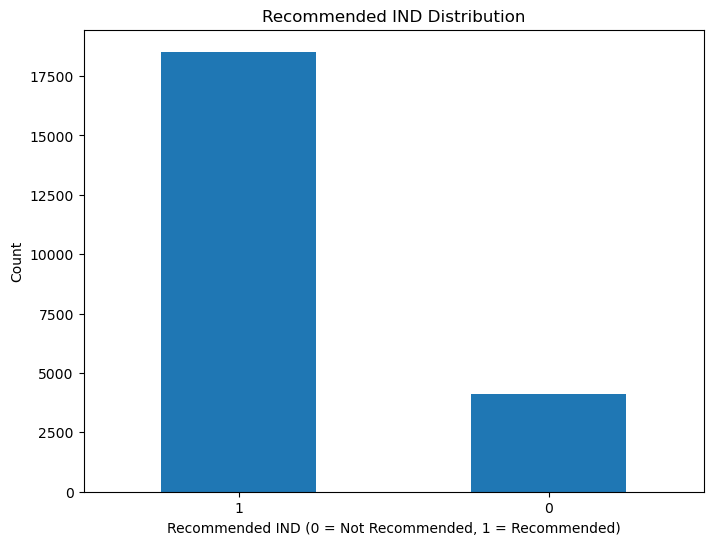

In [166]:
plt.figure(figsize=(8,6))
df['Recommended IND'].value_counts().plot(kind='bar')
plt.title("Recommended IND Distribution")
plt.xticks(rotation=0)
plt.xlabel("Recommended IND (0 = Not Recommended, 1 = Recommended)")
plt.ylabel('Count')
plt.show()

## Recommended IND Distribution Analysis
The majority of reviews (18,523) recommend the product (Recommended IND = 1), while only 4,101 reviews do not recommend it (Recommended IND = 0).

***Key Insights***:
1. **High Recommendation Rate**: About 82% of customers recommend the products, indicating overall customer satisfaction.
2. **Minor Negative Feedback**: Only 18% of customers do not recommend the products, suggesting areas for potential improvement.
3. **Quality Assurance**: Understanding the characteristics of non-recommended products (e.g., low ratings, specific categories) can help improve quality and sales.

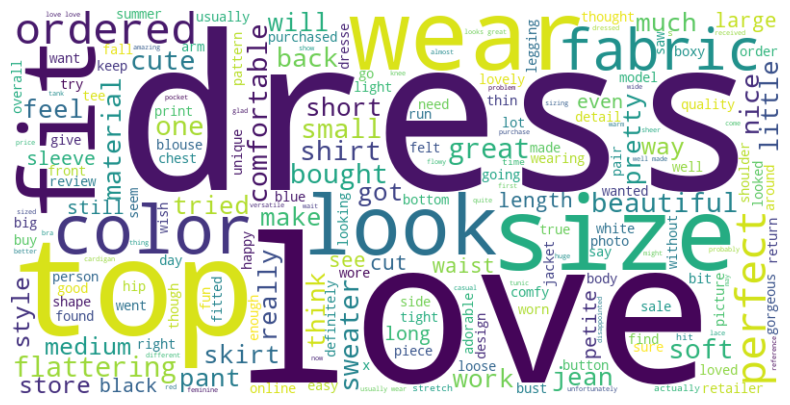

In [197]:
text = " ".join(df['Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()

## Average rating by age group

In [204]:
#define age groups
bins=[18, 25, 35, 50, 65, 100] # Age groups
labels=['18-24', '25-34', '35-49', '50-64', '65+']
df['Age Group']= pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by and Age group and calculate the average
age_group_rating=df.groupby('Age Group')['Rating'].mean().reset_index()

#plot
plt.figure(figsize=(8,6))
sns.barplot(x='Age Group', y='Rating', data=age_group_rating)
plt.title('Average rating by age group')
plt.xlabel('Age Group')
plt.ylabel('Ratings)'

/var/folders/hq/mtv0zwx53pj40mz21_34jjnr0000gn/T/ipykernel_24502/487347411.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_rating=df.groupby('Age Group')['Rating'].mean().reset_index()


In [206]:
print(age_group_rating)

  Age Group    Rating
0     18-24  4.325635
1     25-34  4.118822
2     35-49  4.158619
3     50-64  4.247834
4       65+  4.261606
